# 1. 数据操作  
在深度学习中，不论是预处理阶段还是模型训练过程中，数据操作都是必不可少的。Pytorch数据操作的主要工具室torch.Tensor，即张量。张量类似于NumPy 的ndarray，不同之处在于张量可以在 GPU 或其他硬件加速器上运行。张量和 NumPy 数组通常可以共享相同的底层内存，从而无需复制数据。同时，张量支持自动梯度机制，所以更适合深度学习。

## 1.1 Tensor张量

### 1.1.1 初始化Tensor

导入torch包

In [1]:
import torch

直接使用列表数据

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

使用numpy数组

In [3]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

使用另一个张量

In [4]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_ones)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.6458, 0.4043],
        [0.1126, 0.4690]])


创建指定维度的张量

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8537, 0.1165, 0.1074],
        [0.7207, 0.5171, 0.4656]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


获取张量的大小

In [6]:
data = [[1, 2],[3, 4]]
x = torch.tensor(data)
print(x.size())
print(x.shape)

torch.Size([2, 2])
torch.Size([2, 2])


可以通过下面的函数构建张量

| 函数 |	功能 |
| :-----: | :-----: |
| Tensor(*sizes)	| 基础构造函数| 
| tensor(data,)	| 类似np.array的构造函数| 
| ones(*sizes)	| 全1Tensor| 
| zeros(*sizes)	| 全0Tensor| 
| eye(*sizes)	| 对角线为1，其他为0| 
| arange(s,e,step)	| 从s到e，步长为step| 
| linspace(s,e,steps)	| 从s到e，均匀切分成steps份| 
| rand/randn(*sizes)	| 均匀/标准分布| 
| normal(mean,std)/uniform(from,to)	| 正态分布/均匀分布| 
| randperm(m)	| 随机排列| 

### 1.1.2 张量运算

默认情况下，张量是在 CPU 上创建的。我们需要使用.to方法明确地将张量移动到 GPU （在检查 GPU 可用性之后）。

In [9]:
tensor = torch.zeros((2,3))
print(torch.cuda.is_available())
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

True


单值张量可以通过.item()转换至Python数值

In [21]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


张量与numpy转换

In [22]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

n = np.ones(5)
print(f"n: {n}")
t = torch.from_numpy(n)
print(f"t: {t}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
n: [1. 1. 1. 1. 1.]
t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


切片

In [10]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


张量连接

In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


加法

In [14]:
print(tensor + tensor)

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])


In [16]:
torch.add(tensor, tensor)

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])

In [18]:
#指定输出
result = torch.empty(4, 4)
torch.add(tensor, tensor, out=result)
print(result)

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])


In [20]:
# inplace: 结果储存在原张量上
result.add_(tensor)
print(result)

tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


矩阵元素相乘

In [13]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(z1)
print(z2)
print(z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


矩阵相乘

In [12]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.zeros_like(tensor)
torch.matmul(tensor, tensor.T, out=y3) # 指定输出为y3

print(y1)
print(y2)
print(y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


改变形状  
用view()来改变Tensor的形状。注意view()返回的新Tensor与源Tensor虽然可能有不同的size，但是是共享data的，也即更改其中的一个，另外一个也会跟着改变。(顾名思义，view仅仅是改变了对这个张量的观察角度，内部数据并未改变)

In [24]:
y = tensor.view(16)
print(y)

tensor([1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])


In [26]:
z = tensor.view(2,2,4)
print(z)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


### 1.1.3 线性代数

| 函数 | 功能 |
| :----: | :-----: |
|trace |对角线元素之和(矩阵的迹)|
|diag |对角线元素|
|triu/tril |矩阵的上三角/下三角，可指定偏移量|
|mm/bmm	|矩阵乘法，batch的矩阵乘法|
|addmm/addbmm/addmv/addr/baddbmm..	|矩阵运算|
|t	|转置|
|dot/cross	|内积/外积|
|inverse	|求逆矩阵|
|svd	|奇异值分解|

## 1.2 自动梯度机制 autograd  
在训练神经网络时，最常用的算法是反向传播。在该算法中，参数（模型权重）根据损失函数相对于给定参数的梯度进行调整。为了计算这些梯度，PyTorch 有一个名为 的内置微分引擎torch.autograd，它可以自动计算任何计算图的梯度。

### 1.2.1 概念  
    Tensor是这个包的核心类，如果将其属性.requires_grad设置为True，它将开始追踪(track)在其上的所有操作（这样就可以利用链式法则进行梯度传播了）。完成计算后，可以调用.backward()来完成所有梯度计算。此Tensor的梯度将累积到.grad属性中。  
    
    如果不想要被继续追踪，可以调用.detach()将其从追踪记录中分离出来，这样就可以防止将来的计算被追踪，这样梯度就传不过去了。此外，还可以用with torch.no_grad()将不想被追踪的操作代码块包裹起来，这种方法在评估模型的时候很常用，因为在评估模型时，我们并不需要计算可训练参数（requires_grad=True）的梯度。  
    
    Function是另外一个很重要的类。Tensor和Function互相结合就可以构建一个记录有整个计算过程的有向无环图（DAG）。每个Tensor都有一个.grad_fn属性，该属性即创建该Tensor的Function, 就是说该Tensor是不是通过某些运算得到的，若是，则grad_fn返回一个与这些运算相关的对象，否则是None。  

### 1.2.2 求取梯度过程

In [37]:
x = torch.ones(5)  # 输入
y = torch.zeros(3)  # 输出

考虑最简单的一层神经网络，具有输入x、参数w和b，以及一些损失函数。它可以通过以下方式在 PyTorch 中定义：  
z = x * w + b  
loss = crossentropy( z, y )

1. 设置requires_grad=True使系统了解该变量需要梯度，也可以使用x.requires_grad_(True) 
2. 通过.grad_fn属性可以查看梯度存储位置
3. 未进行运算直接创建的变量没有grad_fn，它们是叶子节点

In [38]:
w = torch.randn(5, 3, requires_grad=True) # 权重
b = torch.randn(3, requires_grad=True) # 偏置
print('Gradient function for w =',w.grad_fn)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) # 损失
print(loss)

Gradient function for w = None
tensor(0.9413, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


In [39]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x00000294958E87C8>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x00000294958E83C8>


通过.backword()可以计算梯度

In [40]:
print(w.grad)
print(w.grad)
loss.backward()
print(w.grad)
print(b.grad)

None
None
tensor([[0.0979, 0.3035, 0.0207],
        [0.0979, 0.3035, 0.0207],
        [0.0979, 0.3035, 0.0207],
        [0.0979, 0.3035, 0.0207],
        [0.0979, 0.3035, 0.0207]])
tensor([0.0979, 0.3035, 0.0207])


### 1.2.3 关闭自动微分机制

在不训练时可以关闭微分机制 :
1. with torch.no_grad():  
2. x.detach() 

In [42]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [43]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## 1.3 数据集 Dataset & DataLoader

处理数据样本的代码可能会变得混乱且难以维护,为了使数据集代码与模型训练代码分离，以获得更好的可读性和模块化。PyTorch提供了两个数据原语：torch.utils.data.DataLoader和torch.utils.data.Dataset ，可以使用预加载数据集或自己的数据。 Dataset存储样本及其相应的标签，DataLoader包装了Dataset，使用户可以迭代访问样本。

### 加载数据集  
以下是如何从 TorchVision加载Fashion-MNIST数据集的示例。Fashion-MNIST 是 Zalando 的文章图像数据集，由 60,000 个训练示例和 10,000 个测试示例组成。每个示例都包含一个 28×28 灰度图像和来自 10 个类别之一的相关标签。

In [44]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",#路径
    train=True,#训练集
    download=True,#是否下载
    transform=ToTensor()#数据预处理
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

查看数据

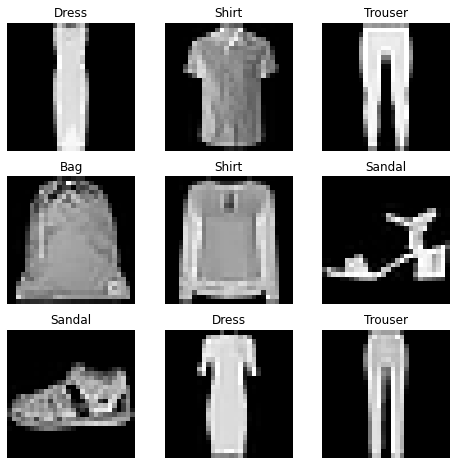

In [45]:
#查看数据
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 使用Dataloader训练  
DataLoader 是一个迭代器,可以按批产生数据、标签，每次迭代可以训练自己的模型。

In [48]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=9, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=9, shuffle=True)

第一批数据:

数据大小： torch.Size([9, 1, 28, 28])


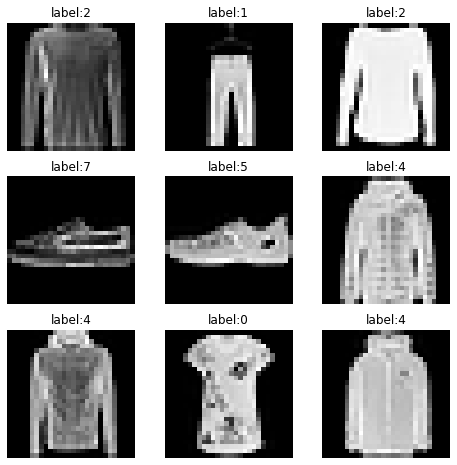

In [52]:
for index, (data, label) in enumerate(train_dataloader):
    print('第一批数据:\n')
    print('数据大小：',data.shape)
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        img = data[i-1]
        figure.add_subplot(rows, cols, i)
        plt.title('label:'+str(label[i-1].item()))
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()
    break